In [1]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [2]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 55.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
from spacy import displacy , tokenizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaModel , LsiModel , TfidfModel
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [4]:
data=pd.read_csv("/content/drive/MyDrive/NLP_Learning/fake_news_data.csv")
data

,title,text,date,fake_or_factual
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News
...,...,...,...,...
193,AND SO IT BEGINS…INSPIRED BY GAY MARRIAGE RULI...,"Well, that didn t take long. Look for the firs...","Jul 2, 2015",Fake News
194,‘Stand Your Ground’: FL Man Shoots At Teens P...,Florida s toxic and dangerous stand your grou...,"July 17, 2016",Fake News
195,The Los Angeles Times Endorses Hillary Clinto...,As Politico reports an almost neck-and-neck ra...,"May 30, 2016",Fake News
196,FBI chief sought more funds for Russia probe d...,WASHINGTON (Reuters) - Former FBI Director Jam...,"May 10, 2017",Factual News


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            198 non-null    object
 1   text             198 non-null    object
 2   date             198 non-null    object
 3   fake_or_factual  198 non-null    object
dtypes: object(4)
memory usage: 6.3+ KB


<Axes: xlabel='fake_or_factual'>

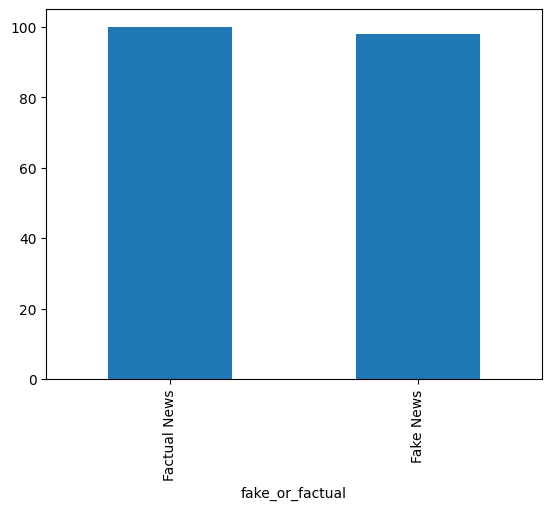

In [6]:
data['fake_or_factual'].value_counts().plot(kind='bar')

**POS Tagging**

In [7]:
nlp=spacy.load("en_core_web_sm")

In [8]:
#lets create fake news and fact news dataframes
fake_news=data[data['fake_or_factual']=='Fake News']
fact_news=data[data['fake_or_factual']=='Factual News']

In [9]:
fact_news

,title,text,date,fake_or_factual
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News
7,"Trump threat fires up U.S. climate activists, ...",(Reuters) - Seattle financial worker Harrison ...,"November 11, 2016",Factual News
9,China labels Trump call 'petty action' by Taiw...,BEIJING (Reuters) - U.S. President-elect Donal...,"December 3, 2016",Factual News
11,Kerry says can't comment on content of Clinton...,QUEBEC CITY (Reuters) - U.S. Secretary of Stat...,"January 29, 2016",Factual News
...,...,...,...,...
184,White House not aware of other nations plannin...,WASHINGTON (Reuters) - The White House said on...,"December 7, 2017",Factual News
185,Four killed as militants attack airport securi...,SRINAGAR (Reuters) - Indian police on Tuesday ...,"October 3, 2017",Factual News
188,Chinese aircraft drill again in Western Pacific,BEIJING (Reuters) - Chinese military aircraft ...,"December 21, 2017",Factual News
192,"France close to Qatar military, transport cont...",PARIS (Reuters) - France is close to finalizin...,"December 4, 2017",Factual News


In [10]:
fake_news

,title,text,date,fake_or_factual
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News
5,Maxine Waters Makes Teens Chant ‘Impeach 45′ a...,Shame on Teen Vogue! Maxine Waters was a guest...,"Dec 10, 2017",Fake News
6,Jay Carney Let It Slip That He Knows Who Obam...,Former White House Press Secretary in the Obam...,"February 10, 2016",Fake News
...,...,...,...,...
191,Terrorist Jon Ritzheimer Uses Sobbing Daughte...,"Jon Ritzheimer, infamous hater of Muslims and ...","January 26, 2016",Fake News
193,AND SO IT BEGINS…INSPIRED BY GAY MARRIAGE RULI...,"Well, that didn t take long. Look for the firs...","Jul 2, 2015",Fake News
194,‘Stand Your Ground’: FL Man Shoots At Teens P...,Florida s toxic and dangerous stand your grou...,"July 17, 2016",Fake News
195,The Los Angeles Times Endorses Hillary Clinto...,As Politico reports an almost neck-and-neck ra...,"May 30, 2016",Fake News


In [11]:
#lets create spacy docs for the dataframes
fake_docs=nlp.pipe(fake_news['text'])
fact_docs=nlp.pipe(fact_news['text'])

In [12]:
def extract_token_tags(doc:spacy.tokens.doc.Doc):
  return[(i.text,i.ent_type_,i.pos_)for i in doc]

In [13]:
fake_tagsdf=[]
columns=['token','ner_tag','pos_tag']

In [14]:
for ix,doc in enumerate(fake_docs):
  token_tags=extract_token_tags(doc)
  tags=pd.DataFrame(token_tags,columns=columns)
  fake_tagsdf.append(tags)

In [15]:
fake_tagsdf=pd.concat(fake_tagsdf)

In [16]:
#same work for fact_docs
fact_tagsdf=[]
columns=['token','ner_tag','pos_tag']

In [17]:
for ix,doc in enumerate(fact_docs):
  token_tags=extract_token_tags(doc)
  tags=pd.DataFrame(token_tags,columns=columns)
  fact_tagsdf.append(tags)

In [18]:
fact_tagsdf=pd.concat(fact_tagsdf)

In [19]:
fact_tagsdf.head()

,token,ner_tag,pos_tag
0,WASHINGTON,GPE,PROPN
1,(,,PUNCT
2,Reuters,ORG,PROPN
3,),,PUNCT
4,-,,PUNCT


In [20]:
pos_count_fake=fake_tagsdf.groupby(['token','pos_tag']).size().reset_index(name='count').sort_values(by='count',ascending=False)
pos_count_fake.head()

,token,pos_tag,count
29,",",PUNCT,1908
7451,the,DET,1834
41,.,PUNCT,1530
5766,of,ADP,922
2665,and,CCONJ,875


In [21]:
#same work with fact
pos_count_fact=fact_tagsdf.groupby(['token','pos_tag']).size().reset_index(name='count').sort_values(by='count',ascending=False)
pos_count_fact.head()

,token,pos_tag,count
6145,the,DET,1903
14,",",PUNCT,1698
21,.,PUNCT,1382
4716,of,ADP,884
1898,a,DET,789


In [22]:
pos_count_fake.groupby('pos_tag')['token'].count().sort_values(ascending=False).head(10)

,token
pos_tag,
NOUN,2586
VERB,1817
PROPN,1672
ADJ,882
ADV,413
NUM,221
PRON,96
ADP,89
AUX,62


In [23]:
pos_count_fact.groupby('pos_tag')['token'].count().sort_values(ascending=False).head(10)

,token
pos_tag,
NOUN,2179
VERB,1539
PROPN,1379
ADJ,747
ADV,263
NUM,205
PRON,79
ADP,70
AUX,43


In [24]:
pos_count_fake[pos_count_fake.pos_tag=='NOUN'][:15]

,token,pos_tag,count
5981,people,NOUN,77
7349,t,NOUN,65
6216,president,NOUN,58
7960,women,NOUN,55
7516,time,NOUN,52
8011,year,NOUN,44
3138,campaign,NOUN,44
4581,government,NOUN,41
5213,law,NOUN,40
8013,years,NOUN,40


In [25]:
pos_count_fact[pos_count_fact.pos_tag=='NOUN'][:15]

,token,pos_tag,count
3738,government,NOUN,71
6618,year,NOUN,64
5901,state,NOUN,57
2360,bill,NOUN,55
1975,administration,NOUN,51
5066,president,NOUN,49
3277,election,NOUN,48
4919,people,NOUN,45
4786,order,NOUN,45
2497,campaign,NOUN,42


### **Named Entities**

In [26]:
top_entities_fake=fake_tagsdf[fake_tagsdf['ner_tag']!= ""].groupby(['token','ner_tag']).size().reset_index(name='count').sort_values(by='count',ascending=False)

In [27]:
top_entities_fact=fact_tagsdf[fact_tagsdf['ner_tag']!= ""].groupby(['token','ner_tag']).size().reset_index(name='count').sort_values(by='count',ascending=False)

In [28]:
import matplotlib as mpl

set2_palette = sns.color_palette("Set2")
hex_colors = [mpl.colors.to_hex(color) for color in set2_palette]

ner_palette={
    'ORG':hex_colors[0],
    'GPE':hex_colors[1],
    'NORP':hex_colors[2],
    'PERSON':hex_colors[3],
    'DATE':hex_colors[4],
    'CARDINAL':hex_colors[5],
    'PERCENT':hex_colors[6]
}

[Text(0.5, 1.0, 'Top 10 Named Entities in Fake News')]

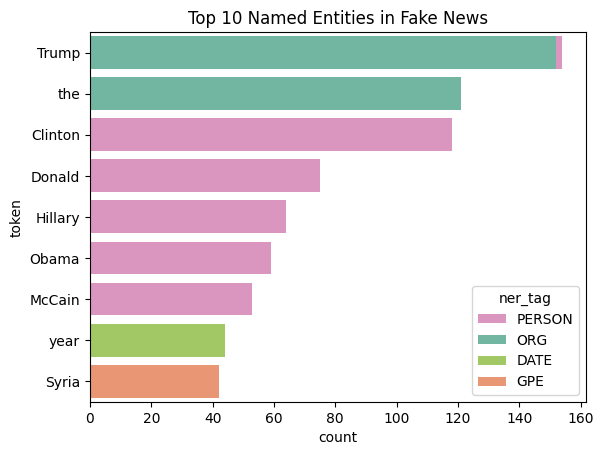

In [29]:
sns.barplot(
    x="count",
    y="token",
    hue="ner_tag",
    palette=ner_palette,
    data=top_entities_fake.head(10),
    orient="h",
    dodge=False
).set(title="Top 10 Named Entities in Fake News")

[Text(0.5, 1.0, 'Top 10 Named Entities in Fact News')]

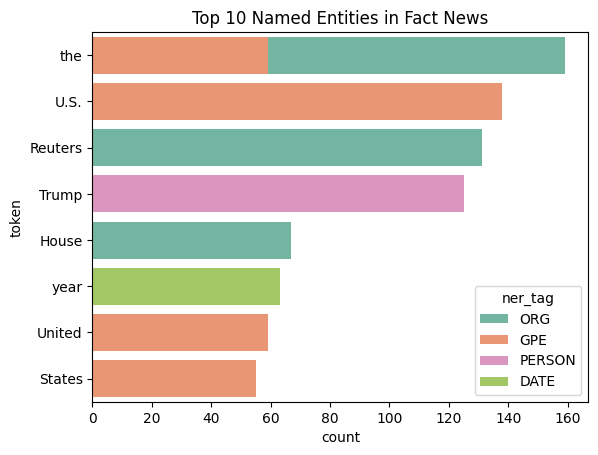

In [30]:
sns.barplot(
    x="count",
    y="token",
    hue="ner_tag",
    palette=ner_palette,
    data=top_entities_fact.head(10),
    orient="h",
    dodge=False
).set(title="Top 10 Named Entities in Fact News")

### **Text-Preprocessing**

In [31]:
data.head()

,title,text,date,fake_or_factual
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News


Looks like some text has place before text (place - text) we need to remove it

In [32]:
data['clean_text']=data.apply(lambda x: re.sub(r'^[^-]*-\s','',x['text']),axis=1)

In [33]:
data.head()

,title,text,date,fake_or_factual,clean_text
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,There are two small problems with your analogy...
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,Buried in Trump s bonkers interview with New Y...
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"Women make up over 50 percent of this country,..."
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,U.S. Defense Secretary Jim Mattis said on Mond...
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,Northern Ireland s political parties are rapid...


In [34]:
data['clean_text']=data['clean_text'].str.lower()

now we remove the punctuation

In [35]:
data['clean_text']=data.apply(lambda x: re.sub(r'[^\w\s]','',x['clean_text']),axis=1)

In [36]:
import nltk
nltk.download('stopwords')
en_stopwords=stopwords.words('english')
print(en_stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


remove stopwords

In [37]:
data['clean_text']=data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in en_stopwords]))

Now we tokenize the data then lemmetize it

In [38]:
import nltk
nltk.download('punkt_tab')
data['clean_text']=data.apply(lambda x: word_tokenize(x['clean_text']),axis=1)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [39]:
import nltk
nltk.download('wordnet')
lemmetizer=WordNetLemmatizer()
data['clean_text']=data['clean_text'].apply(lambda x: [lemmetizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [40]:
data.head()

,title,text,date,fake_or_factual,clean_text
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[two, small, problem, analogy, susan, jesus, m..."
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,..."
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[woman, make, 50, percent, country, grossly, u..."
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[u, defense, secretary, jim, mattis, said, mon..."
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, party, rapidly,..."


In [41]:
tokens_clean=sum(data['clean_text'],[])

In [42]:
unigrams=(pd.Series(nltk.ngrams(tokens_clean,1)).value_counts())
print(unigrams[:10])

(trump,)         580
(said,)          580
(u,)             277
(state,)         275
(president,)     259
(would,)         226
(one,)           160
(clinton,)       141
(year,)          139
(republican,)    137
Name: count, dtype: int64


[Text(0.5, 1.0, 'Most Common Unigrams after preprocessing')]

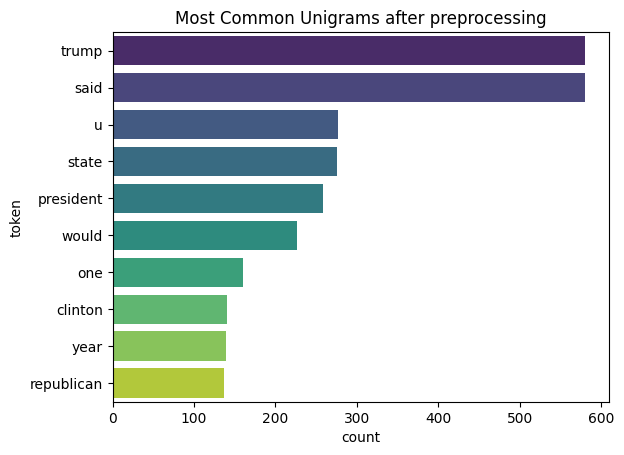

In [43]:
df_for_plot = unigrams.head(10).reset_index()
df_for_plot['index'] = df_for_plot['index'].apply(lambda x: x[0])
df_for_plot = df_for_plot.rename(columns={'index': 'token'})

sns.barplot(
    x="count",
    y="token",
    hue="token", # Assign y variable to hue as suggested by FutureWarning
    palette=sns.color_palette('viridis', len(df_for_plot)), # Provide enough distinct colors
    data=df_for_plot,
    orient="h",
    dodge=False,
    legend=False # Set legend=False as suggested by FutureWarning
).set(title="Most Common Unigrams after preprocessing")

In [44]:
bigrams=(pd.Series(nltk.ngrams(tokens_clean,2)).value_counts())
print(bigrams[:10])

(donald, trump)            113
(united, state)             84
(white, house)              74
(president, donald)         47
(hillary, clinton)          39
(new, york)                 33
(supreme, court)            30
(image, via)                29
(official, said)            26
(trump, administration)     26
Name: count, dtype: int64


[Text(0.5, 1.0, 'Most Common Bigrams after preprocessing')]

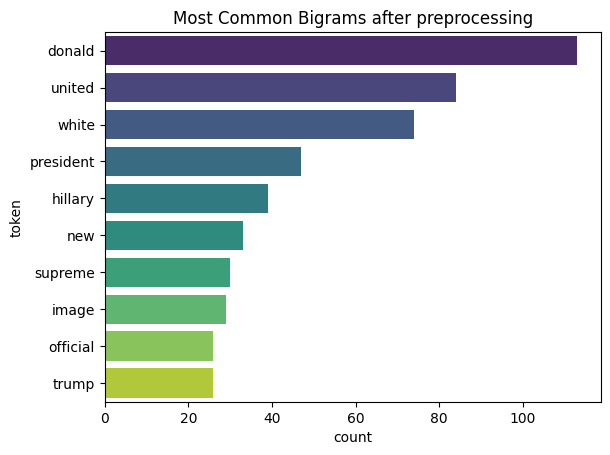

In [45]:
df_for_plot2 = bigrams.head(10).reset_index()
df_for_plot2['index'] = df_for_plot2['index'].apply(lambda x: x[0])
df_for_plot2 = df_for_plot2.rename(columns={'index': 'token'})

sns.barplot(
    x="count",
    y="token",
    hue="token", # Assign y variable to hue as suggested by FutureWarning
    palette=sns.color_palette('viridis', len(df_for_plot2)), # Provide enough distinct colors
    data=df_for_plot2,
    orient="h",
    dodge=False,
    legend=False # Set legend=False as suggested by FutureWarning
).set(title="Most Common Bigrams after preprocessing")

### **Sentiment Analysis**

In [46]:
vaderSentiment=SentimentIntensityAnalyzer() #initialize the vaderSentiment

In [47]:
data['vader_sentiment_score']=data['text'].apply(lambda x: vaderSentiment.polarity_scores(x)['compound'])#we calculate vader_score
data

,title,text,date,fake_or_factual,clean_text,vader_sentiment_score
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[two, small, problem, analogy, susan, jesus, m...",-0.3660
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,...",-0.8197
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[woman, make, 50, percent, country, grossly, u...",0.9779
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[u, defense, secretary, jim, mattis, said, mon...",-0.3400
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, party, rapidly,...",0.8590
...,...,...,...,...,...,...
193,AND SO IT BEGINS…INSPIRED BY GAY MARRIAGE RULI...,"Well, that didn t take long. Look for the firs...","Jul 2, 2015",Fake News,"[well, take, long, look, first, beastiality, m...",0.9001
194,‘Stand Your Ground’: FL Man Shoots At Teens P...,Florida s toxic and dangerous stand your grou...,"July 17, 2016",Fake News,"[florida, toxic, dangerous, stand, ground, gun...",-0.9946
195,The Los Angeles Times Endorses Hillary Clinto...,As Politico reports an almost neck-and-neck ra...,"May 30, 2016",Fake News,"[politico, report, almost, neckandneck, race, ...",0.9958
196,FBI chief sought more funds for Russia probe d...,WASHINGTON (Reuters) - Former FBI Director Jam...,"May 10, 2017",Factual News,"[former, fbi, director, james, comey, requeste...",-0.5719


In [48]:
#we need to label the scores for better and simple understanding
bins=[-1,-0.1, 0.1, 1]
labels=['Negative','Neutral','Positive']
data['vader_sentiment']=pd.cut(data['vader_sentiment_score'],bins=bins,labels=labels)

In [49]:
data

,title,text,date,fake_or_factual,clean_text,vader_sentiment_score,vader_sentiment
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[two, small, problem, analogy, susan, jesus, m...",-0.3660,Negative
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,...",-0.8197,Negative
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[woman, make, 50, percent, country, grossly, u...",0.9779,Positive
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[u, defense, secretary, jim, mattis, said, mon...",-0.3400,Negative
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, party, rapidly,...",0.8590,Positive
...,...,...,...,...,...,...,...
193,AND SO IT BEGINS…INSPIRED BY GAY MARRIAGE RULI...,"Well, that didn t take long. Look for the firs...","Jul 2, 2015",Fake News,"[well, take, long, look, first, beastiality, m...",0.9001,Positive
194,‘Stand Your Ground’: FL Man Shoots At Teens P...,Florida s toxic and dangerous stand your grou...,"July 17, 2016",Fake News,"[florida, toxic, dangerous, stand, ground, gun...",-0.9946,Negative
195,The Los Angeles Times Endorses Hillary Clinto...,As Politico reports an almost neck-and-neck ra...,"May 30, 2016",Fake News,"[politico, report, almost, neckandneck, race, ...",0.9958,Positive
196,FBI chief sought more funds for Russia probe d...,WASHINGTON (Reuters) - Former FBI Director Jam...,"May 10, 2017",Factual News,"[former, fbi, director, james, comey, requeste...",-0.5719,Negative


<Axes: xlabel='vader_sentiment'>

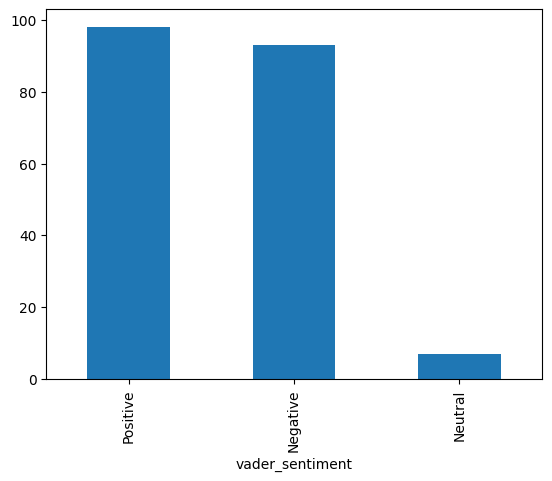

In [50]:
data['vader_sentiment'].value_counts().plot(kind='bar')

[Text(0.5, 1.0, 'Sentiment by News Type')]

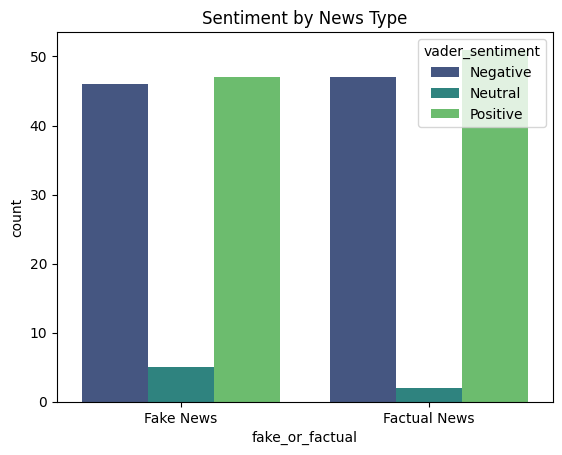

In [51]:
sns.countplot(
    x="fake_or_factual",
    hue="vader_sentiment",
    data=data,
    palette=sns.color_palette('viridis', 3) # Provide a palette with 3 colors for the 3 sentiment categories
).set(title="Sentiment by News Type")

### **Topic Modeling**

In [52]:
fake_news_text=data[data['fake_or_factual']=='Fake News']['clean_text'].reset_index(drop=True)

In [53]:
dict_fake=corpora.Dictionary(fake_news_text)

In [54]:
doc_term_fake=[dict_fake.doc2bow(text) for text in fake_news_text]

In [55]:
coherence_values=[]
model_list=[]
min_topics=2
max_topics=11

In [56]:
for num_topics_i in range(min_topics,max_topics+1):
  model=gensim.models.LdaModel(corpus=doc_term_fake,id2word=dict_fake,num_topics=num_topics_i)
  model_list.append(model)
  coherence_model=CoherenceModel(model=model,texts=fake_news_text,dictionary=dict_fake,coherence='c_v')
  coherence_values.append(coherence_model.get_coherence())

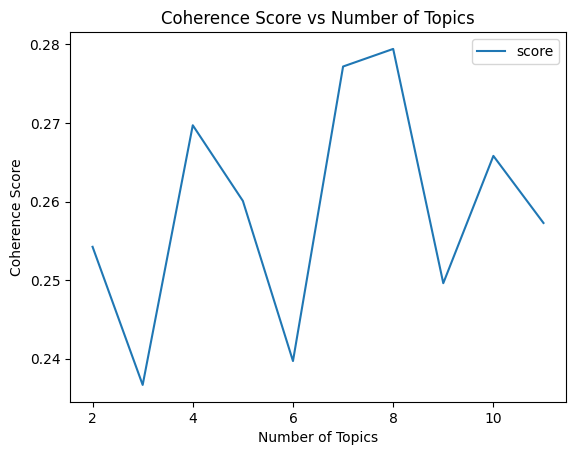

In [57]:
plt.plot(range(min_topics,max_topics+1),coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs Number of Topics")
plt.legend(['score'],loc='best')
plt.show()

In [58]:
final_n_topics=3
lsamodel_f=LsiModel(corpus=doc_term_fake,id2word=dict_fake,num_topics=final_n_topics)

In [59]:
lsamodel_f.print_topics(num_topics=final_n_topics,num_words=5)

[(0,
  '0.425*"mccain" + 0.271*"syria" + 0.257*"trump" + 0.197*"u" + 0.164*"one"'),
 (1,
  '-0.629*"trump" + 0.347*"mccain" + 0.216*"syria" + -0.125*"clinton" + -0.116*"president"'),
 (2,
  '0.381*"trump" + -0.297*"email" + -0.246*"clinton" + -0.231*"department" + -0.221*"record"')]

In [60]:
def tfidf_corpus(doc_term_matrix):
  tfidf=TfidfModel(corpus=doc_term_matrix,normalize=True)
  corpus_tfidf=tfidf[doc_term_matrix]
  return corpus_tfidf

In [61]:
def get_coherence_scores(corpus,dictionary,texts,min_topics,max_topics):
  coherence_values=[]
  model_list=[]
  for min_topics_i in range(min_topics,max_topics+1):
    model=LsiModel(corpus=corpus,id2word=dictionary,num_topics=min_topics_i)
    model_list.append(model)
    coherence_model=CoherenceModel(model=model,texts=texts,dictionary=dictionary,coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())
  plt.plot(range(min_topics,max_topics+1),coherence_values)
  plt.xlabel("Number of Topics")
  plt.ylabel("Coherence Score")
  plt.title("Coherence Score vs Number of Topics")
  plt.legend(['score'],loc='best')
  plt.show()

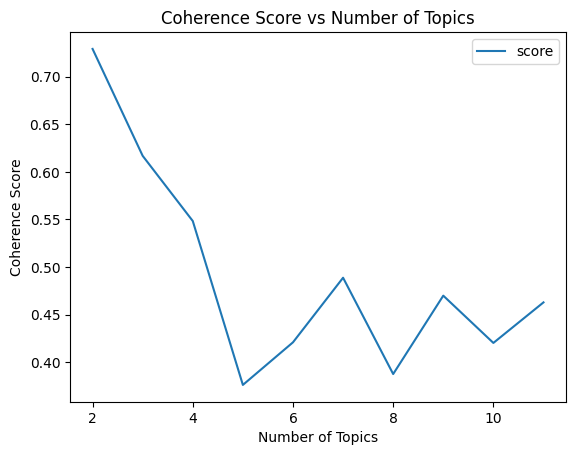

In [62]:
corpus_tfidf_fake=tfidf_corpus(doc_term_fake)
get_coherence_scores(corpus_tfidf_fake,dict_fake,fake_news_text,2,11)

In [63]:
final_n_topicsF=3
lsamodel_f=LsiModel(corpus=corpus_tfidf_fake,id2word=dict_fake,num_topics=final_n_topicsF)
lsamodel_f.print_topics(num_topics=final_n_topics,num_words=5)

[(0,
  '0.190*"trump" + 0.136*"clinton" + 0.095*"hillary" + 0.094*"obama" + 0.089*"president"'),
 (1,
  '-0.325*"boiler" + -0.284*"acr" + -0.244*"room" + -0.240*"pm" + -0.186*"broadcast"'),
 (2,
  '0.623*"flynn" + 0.182*"immunity" + 0.122*"nana" + 0.116*"mr" + 0.110*"30"')]

### **Create classfification model**

In [64]:
data.head()

,title,text,date,fake_or_factual,clean_text,vader_sentiment_score,vader_sentiment
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[two, small, problem, analogy, susan, jesus, m...",-0.3660,Negative
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,...",-0.8197,Negative
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[woman, make, 50, percent, country, grossly, u...",0.9779,Positive
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[u, defense, secretary, jim, mattis, said, mon...",-0.3400,Negative
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, party, rapidly,...",0.8590,Positive


In [65]:
X=[','.join(map(str,l)) for l in data['clean_text']]
y=data['fake_or_factual']

In [66]:
cvec=CountVectorizer()
cvec_fit=cvec.fit_transform(X)

In [67]:
bag_of_words=pd.DataFrame(cvec_fit.toarray(),columns=cvec.get_feature_names_out())

In [68]:
X_train,X_test,y_train,y_test=train_test_split(bag_of_words,y,test_size=0.3,random_state=7)

In [69]:
#LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
accuracy_score(y_test,y_pred_lr)

0.7833333333333333

In [70]:
#SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train,y_train)
y_pred_sgd=sgd.predict(X_test)
accuracy_score(y_test,y_pred_sgd)

0.7833333333333333

In [71]:
#we will use now Naive Bayes
nb=MultinomialNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
accuracy_score(y_test,y_pred_nb)

0.8166666666666667

In [72]:
#Random Forests
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.8333333333333334